In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smfrmla
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import tukeyhsd
import statsmodels.api as sm
import pylab
import warnings
warnings.filterwarnings('ignore')
#turn of data table rendering
pd.set_option('display.notebook_repr_html', True)
sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.20.2'

In [3]:
data=pd.read_csv("CRD.csv")
data

,trt,value
0,1,850.50
1,1,453.60
2,1,878.85
3,1,623.70
4,1,510.30
5,1,765.45
6,1,680.40
7,1,595.35
8,1,538.65
9,1,850.50


In [4]:
data.head()

,trt,value
0,1,850.50
1,1,453.60
2,1,878.85
3,1,623.70
4,1,510.30


In [5]:
data.tail()

,trt,value
55,3,652.05
56,3,567.00
57,3,453.60
58,3,652.05
59,3,567.00


In [6]:
data.value.describe()

count      60.000000
mean      679.455000
std       210.279461
min       368.550000
25%       538.650000
50%       623.700000
75%       793.800000
max      1474.200000
Name: value, dtype: float64

<AxesSubplot:>

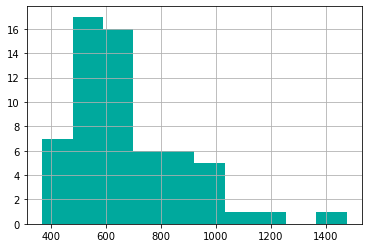

In [7]:
data.value.hist()

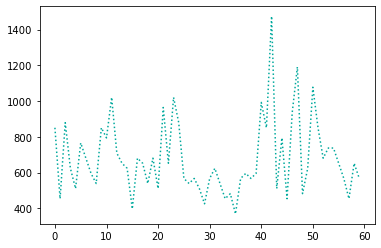

In [8]:
plt.plot(data['value'], linestyle = 'dotted')
plt.show()

<AxesSubplot:xlabel='value'>

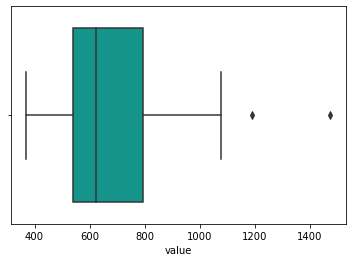

In [9]:
sns.boxplot("value", data=data)

<AxesSubplot:xlabel='trt', ylabel='value'>

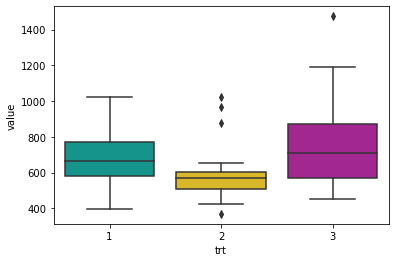

In [10]:
sns.boxplot(data["trt"],data['value'])

<AxesSubplot:xlabel='trt', ylabel='value'>

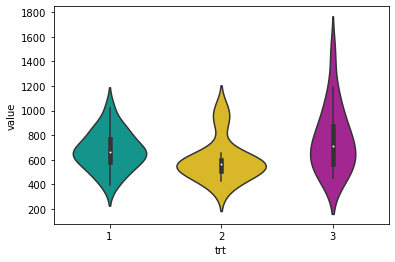

In [11]:
sns.violinplot('trt' ,'value', data=data)

### Special tests for normal distributions
Since the normal distribution is the most common distribution in statistics, there are several additional functions available to test whether a sample could have been drawn from a normal distribution.

First, we can test if skew and kurtosis of our sample differ significantly from those of a normal distribution:

In [12]:
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(data['value']))

print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(data['value']))


normal skewtest teststat =  3.743 pvalue = 0.0002
normal kurtosistest teststat =  2.599 pvalue = 0.0093


#### These two tests are combined in the normality test

In [13]:
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(data['value']))

normaltest teststat = 20.765 pvalue = 0.0000


In all three tests, the p-values are very low and we can reject the hypothesis that the our sample has skew and kurtosis of the normal distribution.

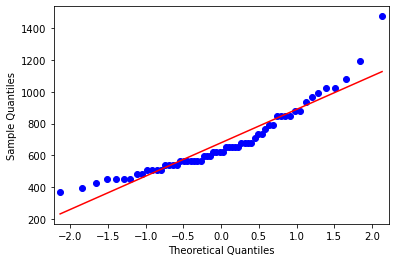

In [14]:
sm.qqplot(data['value'], line="r")
pylab.show()

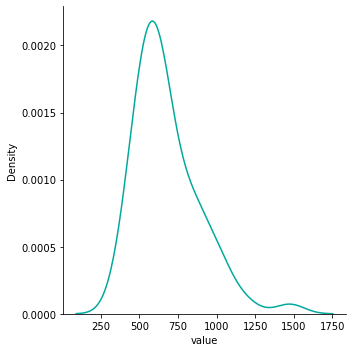

In [15]:
sns.displot(data, x="value", kind="kde")#,hue='treatment')


In [16]:
olsmod = smfrmla.ols('value~C(trt)', data=data)
model = olsmod.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     3.304
Date:                Mon, 07 Jun 2021   Prob (F-statistic):             0.0439
Time:                        16:46:52   Log-Likelihood:                -402.25
No. Observations:                  60   AIC:                             810.5
Df Residuals:                      57   BIC:                             816.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     674.7300     45.285     14.900      0.000     584.049     765.411
C(trt)[T.2]   -75.1275     64.042     -1.173      0.246    -203.369      53.114
C(trt)[T.3]    89.3025     64.042      1.394      0.169     -38.939     217.544
==============================================================================
Omnibus:                       15.678   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.628
Skew:                           1.096   Prob(JB):                     9.02e-05
Kurtosis:                       4.626   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
aov = sm.stats.anova_lm(model, typ=3) # Type 2 ANOVA DataFrame
print(aov)

                 sum_sq    df           F        PR(>F)
Intercept  9.105211e+06   1.0  222.003507  2.584701e-21
C(trt)     2.710420e+05   2.0    3.304277  4.387742e-02
Residual   2.337788e+06  57.0         NaN           NaN


<AxesSubplot:xlabel='trt', ylabel='value'>

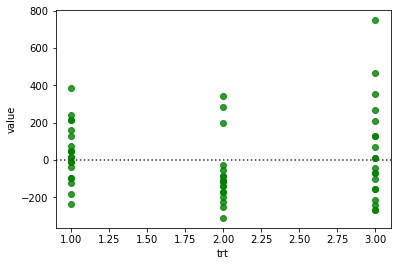

In [18]:
sns.residplot(data['trt'],data['value'],color="g")

In [19]:
res=model.resid
res

0     175.7700
1    -221.1300
2     204.1200
3     -51.0300
4    -164.4300
5      90.7200
6       5.6700
7     -79.3800
8    -136.0800
9     175.7700
10    119.0700
11    345.8700
12     34.0200
13    -22.6800
14    -51.0300
15   -277.8300
16      5.6700
17    -22.6800
18   -136.0800
19      5.6700
20    -89.3025
21    364.2975
22     52.4475
23    420.9975
24    279.2475
25    -32.6025
26    -60.9525
27    -32.6025
28    -89.3025
29   -174.3525
30    -32.6025
31     24.0975
32    -60.9525
33   -146.0025
34   -117.6525
35   -231.0525
36    -32.6025
37     -4.2525
38    -32.6025
39     -4.2525
40    228.2175
41     86.4675
42    710.1675
43   -253.7325
44     29.7675
45   -310.4325
46    171.5175
47    426.6675
48   -282.0825
49   -140.3325
50    313.2675
51     86.4675
52    -83.6325
53    -26.9325
54    -26.9325
55   -111.9825
56   -197.0325
57   -310.4325
58   -111.9825
59   -197.0325
dtype: float64

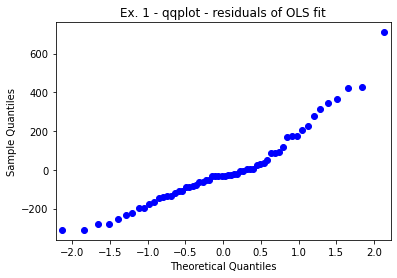

In [20]:
pplot = sm.ProbPlot(res)
fig = pplot.qqplot()
h = plt.title("Ex. 1 - qqplot - residuals of OLS fit")
plt.show()

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     1      2 -75.1275 0.4757 -229.2374  78.9824  False
     1      3  89.3025 0.3514  -64.8074 243.4124  False
     2      3   164.43  0.034   10.3201 318.5399   True
-------------------------------------------------------


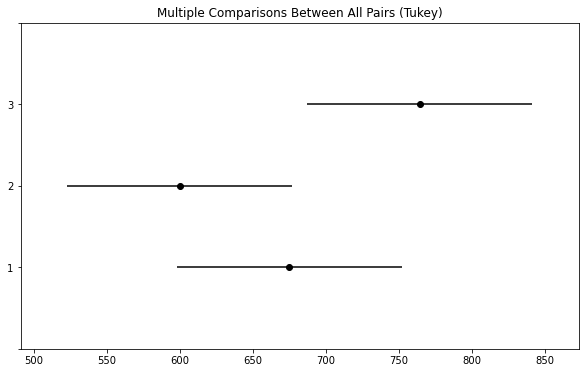

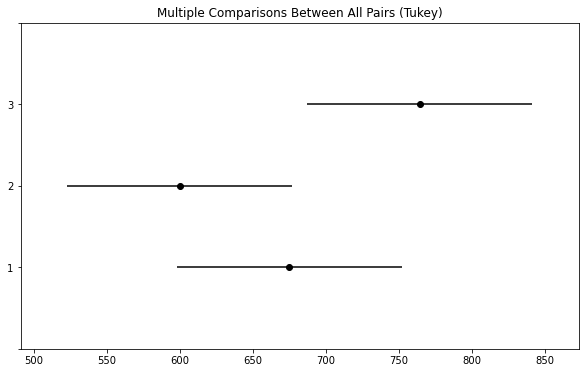

In [21]:
Tukey_HSD = pairwise_tukeyhsd(data['value'],data['trt'],alpha=0.05)
print(Tukey_HSD)
Tukey_HSD.plot_simultaneous()

In [22]:
fitted_data, fitted_lambda = stats.boxcox(data['value'])
print(fitted_data)

[1.49960097 1.49046578 1.49998145 1.49556453 1.49247732 1.49832123
 1.49678137 1.49488476 1.4933497  1.49960097 1.49877304 1.50161603
 1.49732865 1.4961949  1.49556453 1.48798821 1.49678137 1.4961949
 1.4933497  1.49678137 1.49247732 1.50101015 1.4961949  1.50161603
 1.49998145 1.49414907 1.4933497  1.49414907 1.49247732 1.48929552
 1.49414907 1.49556453 1.4933497  1.49046578 1.49152064 1.48651615
 1.49414907 1.49488476 1.49414907 1.49488476 1.50132027 1.49960097
 1.50501274 1.49247732 1.49877304 1.49046578 1.50068452 1.50314067
 1.49152064 1.49556453 1.50216851 1.49960097 1.49678137 1.49784077
 1.49784077 1.4961949  1.49414907 1.49046578 1.4961949  1.49414907]


<AxesSubplot:>

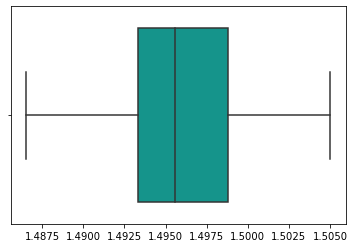

In [23]:
sns.boxplot(fitted_data)

In [ ]:
fitted_lambda

<AxesSubplot:ylabel='Density'>

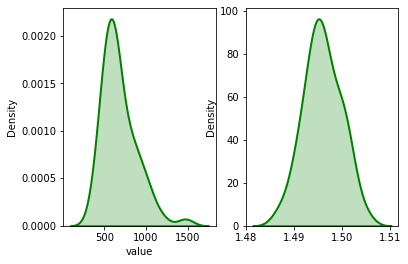

In [24]:
fig, ax = plt.subplots(1, 2)
sns.distplot(data['value'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

In [25]:
data['fitdata'] = fitted_data
data.head()

,trt,value,fitdata
0,1,850.50,1.499601
1,1,453.60,1.490466
2,1,878.85,1.499981
3,1,623.70,1.495565
4,1,510.30,1.492477


In [26]:
new_olsmod = smfrmla.ols('fitdata~C(trt)', data)
new_model = new_olsmod.fit()
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                fitdata   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     3.232
Date:                Mon, 07 Jun 2021   Prob (F-statistic):             0.0468
Time:                        16:52:18   Log-Likelihood:                 251.63
No. Observations:                  60   AIC:                            -497.3
Df Residuals:                      57   BIC:                            -491.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.4961      0.001   1786.214      

In [27]:
new_aov = sm.stats.anova_lm(new_model, typ=2) # Type 2 ANOVA DataFrame
print(new_aov)

            sum_sq    df         F    PR(>F)
C(trt)    0.000091   2.0  3.232127  0.046811
Residual  0.000800  57.0       NaN       NaN
